In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt

# La méthode de régression linéaire

La méthode de régression linéaire permet d'approximer au mieux une droite à un jeu de données. Cette idée peut être étendue dans le but d'approximer n'importe quelle courbe à un jeu de données. 

## Algèbre de base

Une ligne peut être définie par l'équation d'une droite :

$$y = a x + b$$

$a$ est la pente, et $b$ est le point d'intersection avec l'axe des ordonnées. Etant donné deux points $A(x_1, y_1$) et $B(x_2, y_2$), nous avons deux équations avec deux inconnues. Il est alors possible de résoudre $a$ et $b$ à la main.

Par exemple, considérons les deux points $A(2, 1)$ et $B(3, 3)$ :

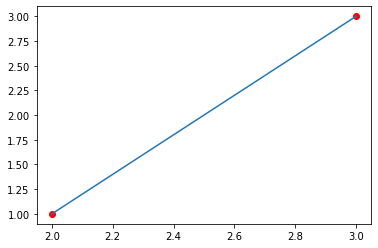

In [6]:
(x1, y1) = (2, 1)
(x2, y2) = (3, 3)

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot([x1, x2], [y1, y2])
plt.show()

Pour trouver les constantes $a$ et $b$ de l'équation de la droite, on peut écrire l'équation de la doite aux deux points $A(1,2)$ et $B(3,3)$ et ainsi obtenir deux équations :

$$1 = 2 a + b$$

$$3 = 3 a + b$$

Il ne reste ensuite plus qu'à résoudre cette équation à deux inconnues, et on trouve les valeurs de $a$ et $b$ :

$$a = 2$$

$$b = -3$$

Pour vérifier, dessinons la droite obtenue :

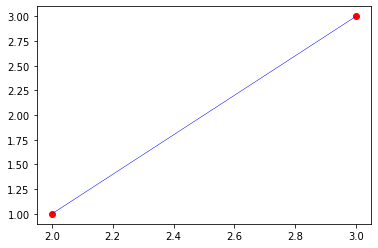

In [22]:
a = 2
b = -3

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')

x= np.linspace(2.0,3.0,num=10)

droite = a*x+b
plt.plot(x, droite, color='blue', linewidth=0.5)

plt.show()

## Algèbre Linéaire

Le problème qu'on a vu peut être écrit à l'aide des outils mathématiques de [l'Algèbre Linéaire](https://fr.wikipedia.org/wiki/Alg%C3%A8bre_lin%C3%A9aire). Le système de deux équations à deux inconnues peut-être écrit sous forme matricielle :

$$1 = 2 a + b$$

$$3 = 3 a + b$$

$$ \begin{bmatrix}
1 \\
3
\end{bmatrix} = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Ce qu'on peut écrire plus généralement sous forme d'une équation matricielle :

$$y = A v$$

$y$ et $v$ sont des vecteurs et $A$ est une matrice :

$$y = \begin{bmatrix}
1 \\
3
\end{bmatrix}$$

$$v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

$$A = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix}$$

Pour trouver $a$ et $b$, ce qui est équivalent à trouver le vecteur $v$, regardons comment on peut résoudre une simple équation comme :

$$1 = 2 x$$

On multiplie les deux côtés de l'équation par l'inverse de $2$, c'est-à-dire $2^{-1}$ :

$$2^{-1} \times 1 = 2^{-1} \times 2 x$$

Comme $2 \times 2^{-1}$ = $1$, on a :

$$x = \frac{1}{2}$$

Par analogie, multiplier l'équation matricielle précédente par l'inverse de $A$, c'est-à-dire $A^{-1}$, des deux côtés amène à cela :

$$y = A v$$

$$A^{-1} y = A^{-1} A v$$

La quantité $A^{-1} A$ est la [matrice identitée](https://fr.wikipedia.org/wiki/Matrice_identit%C3%A9), ainsi le vecteur $v$ devient :

$$v = A^{-1} y$$

NumPy contient des fonctions qui permettent de calculer l'inverse d'une matrice.

In [27]:
# Création d'une matrice 2x2

A = np.array([[2, 1], [3, 1]])
A

array([[2, 1],
       [3, 1]])

In [29]:
# Calcul de l'inverse de la matrice A

Ainv = np.linalg.inv(A)
Ainv

array([[-1.,  1.],
       [ 3., -2.]])

In [30]:
# Multiplions l'inverse de A avec A pour vérifier qu'on obtient bien la matrice identitée

Ainv.dot(A)

array([[1.0000000e+00, 0.0000000e+00],
       [4.4408921e-16, 1.0000000e+00]])

On obtient bien les valeurs de la matrice identité avec quelques erreurs d'arrondis :

$$A^{-1} A = I = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

Multiplions le vecteur $y$ avec $A^{-1}$ afin de trouver le vecteur $v$ :

In [31]:
y = np.array([1, 3])
v = Ainv.dot(y)
v

array([ 2., -3.])

On obtient le même résultat qu'avec la méthode non matricielle.

## Avec davantage de données

Considérons le cas où plus de deux points sont disponibles.

Given a set of samples, $x_1, x_2, ... x_n$ and $y_1, y_2, ... y_n$, a simple linear model can be written as:

$$ y_i = a x_i + b$$

This can be rewritten in matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Introduce variables for simplification:

$$ y = \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix}$$

$$ A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Substitute variables above to produce a simplifed form:

$$ y = A v$$

If $A$ is a square matrix, i.e. $n = 2$, $a$ and $b$ can be determined exactly:

$$ \begin{bmatrix}
a \\
b
\end{bmatrix} = v = A^{-1} y$$

In the case where $n > 2$, $A$ is not square and cannot be inverted. One solution is to compute a pseudo-inverse by multiplying $A$ by it's transpose $A^T$, which will yield a square matrix on the right hand side:

$$ A^T y = A^T A v$$

The matrix $A^T A$ on the right can be eliminated by multiplying by it's inverse $(A^T A)^{-1}$:

$$ (A^T A)^{-1} A^T y = (A^T A)^{-1} (A^T A) v$$

Simplifying yields the result for $a$ and $b$:

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$

## Exemple numérique

L'exemple suivant utlise des valeurs réelles.

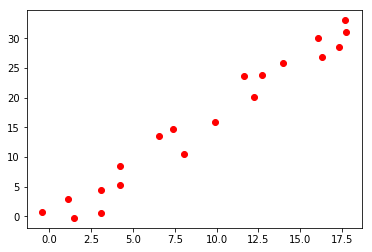

In [ ]:
x = np.array([-0.40033681,  1.12710083,  1.51535892,  3.13012734,  3.07744676,
        4.25275393,  6.535855  ,  4.23343874,  8.048823  ,  7.38773014,
        9.91933651, 12.69142755, 11.61959316, 12.20667906, 13.98048109,
       16.07602619, 16.31351797, 17.31102756, 17.74511659, 17.66863483])

y = np.array([ 0.7261771 ,  2.86206199, -0.2489528 ,  0.63325248,  4.49244568,
        5.30531409, 13.6101148 ,  8.48395548, 10.42996366, 14.74172737,
       15.88897483, 23.76571743, 23.61602269, 20.17880228, 25.85779471,
       30.11114371, 26.88735809, 28.57977723, 30.99383456, 33.03676545])

plt.scatter(x, y, color='red')
plt.show()

Prepare matrix A of the form

$$A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

In [ ]:
x_matrix = x.reshape((-1, 1))
ones = np.ones((len(x), 1))
A = np.append(x_matrix, ones, axis=1)
A

array([[-0.40033681,  1.        ],
       [ 1.12710083,  1.        ],
       [ 1.51535892,  1.        ],
       [ 3.13012734,  1.        ],
       [ 3.07744676,  1.        ],
       [ 4.25275393,  1.        ],
       [ 6.535855  ,  1.        ],
       [ 4.23343874,  1.        ],
       [ 8.048823  ,  1.        ],
       [ 7.38773014,  1.        ],
       [ 9.91933651,  1.        ],
       [12.69142755,  1.        ],
       [11.61959316,  1.        ],
       [12.20667906,  1.        ],
       [13.98048109,  1.        ],
       [16.07602619,  1.        ],
       [16.31351797,  1.        ],
       [17.31102756,  1.        ],
       [17.74511659,  1.        ],
       [17.66863483,  1.        ]])

Compute the pseudo-inverse

$$(A^T A)^{-1} A^T$$

In [ ]:
At = A.T
pseudo_inv = np.linalg.inv(At.dot(A)).dot(At)
pseudo_inv

array([[-0.01354453, -0.01139449, -0.01084797, -0.008575  , -0.00864916,
        -0.00699478, -0.00378106, -0.00702197, -0.00165139, -0.00258195,
         0.00098157,  0.0048836 ,  0.00337487,  0.00420126,  0.00669809,
         0.0096478 ,  0.0099821 ,  0.01138621,  0.01199723,  0.01188958],
       [ 0.17490775,  0.15508006,  0.15004008,  0.12907875,  0.1297626 ,
         0.11450593,  0.08486897,  0.11475666,  0.06522911,  0.07381077,
         0.04094796,  0.00496341,  0.01887691,  0.01125594, -0.0117698 ,
        -0.0389721 , -0.04205498, -0.05500366, -0.06063858, -0.05964577]])

Compute $a$ and $b$ by multiplying the pseudo-inverse times $y$

$$\begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$

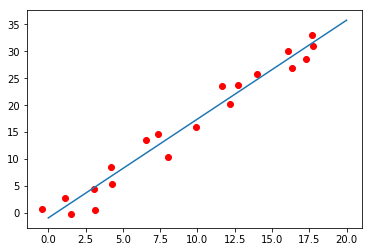

In [ ]:
(a, b) = pseudo_inv.dot(y)

x_points = [0, 20]
y_points = [a*x + b for x in x_points]
plt.scatter(x, y, color='red')
plt.plot(x_points, y_points)
plt.show()

## Précision d'un modèle

La précision d'un modèle d'apprentissage automatique peut être mesurée en calculant l'erreur quadratique moyenne entre les valeurs prédites et les valeurs obtenues par l'entrainement :

$$ \epsilon = \frac{1}{m} \sum_{i=1}^{m} (a x_i + b - y_i)^2 $$

L'erreur de prédiction peut être calculée de la même manière, mais en utilisant les échantillons de tests à la place des échantillons d'entrainement.

Test error can be different and training error, for example:

- If training error is high, this is a case of __high bias__. This generally means the model is not powerful enough to fit the training data.
- If the training error is low, but the test error is high, this is a case of __high variance__. This usually often means the model is overfitting and does not generalize well with data it has not seen.

In [ ]:
epsilon = ((a*x + b - y)**2).mean()
math.sqrt(epsilon)

2.1254120025204726

## Extending the Model

In the case where a straight line will not accurately fit the available data, a more complex model can be used. For example, a quadratic model might be more suitable:

$$ y_i = a {x_i}^2 + b x_i + c \tag{10}$$

In matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} \tag{11}$$

In this case the matrix $A$ is:

$$ A = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix}\tag{12}$$

The same procedure can be used to find $a$, $b$, and $c$:

$$ \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = (A^T A)^{-1} A^T y \tag{13}$$